In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

import sklearn as sk
from sklearn.metrics import r2_score

from sklearn.model_selection import train_test_split

In [2]:
world_rank = pd.read_csv('../input/cwurData.csv')

In [3]:
world_rank.info()
world_rank.describe([0.25,0.50,0.75,0.99])
world_rank.columns
world_rank[list(world_rank.dtypes[world_rank.dtypes=='object'].index)].head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 14 columns):
world_rank              2200 non-null int64
institution             2200 non-null object
country                 2200 non-null object
national_rank           2200 non-null int64
quality_of_education    2200 non-null int64
alumni_employment       2200 non-null int64
quality_of_faculty      2200 non-null int64
publications            2200 non-null int64
influence               2200 non-null int64
citations               2200 non-null int64
broad_impact            2000 non-null float64
patents                 2200 non-null int64
score                   2200 non-null float64
year                    2200 non-null int64
dtypes: float64(2), int64(10), object(2)
memory usage: 240.7+ KB


,institution,country
0,Harvard University,USA
1,Massachusetts Institute of Technology,USA
2,Stanford University,USA
3,University of Cambridge,United Kingdom
4,California Institute of Technology,USA


In [4]:
world_rank.shape

(2200, 14)

In [5]:
world_rank.isnull().all()
world_rank.isnull().any()
round(100*(world_rank.isnull().sum()/len(world_rank.index)),2)

world_rank              0.00
institution             0.00
country                 0.00
national_rank           0.00
quality_of_education    0.00
alumni_employment       0.00
quality_of_faculty      0.00
publications            0.00
influence               0.00
citations               0.00
broad_impact            9.09
patents                 0.00
score                   0.00
year                    0.00
dtype: float64

In [6]:
world_rank= world_rank[~world_rank.broad_impact.isnull()]

In [7]:
round(100*(world_rank.isnull().sum()/len(world_rank.index)),2)

world_rank              0.0
institution             0.0
country                 0.0
national_rank           0.0
quality_of_education    0.0
alumni_employment       0.0
quality_of_faculty      0.0
publications            0.0
influence               0.0
citations               0.0
broad_impact            0.0
patents                 0.0
score                   0.0
year                    0.0
dtype: float64

In [8]:
world_rank.dtypes[world_rank.dtypes!='object']

world_rank                int64
national_rank             int64
quality_of_education      int64
alumni_employment         int64
quality_of_faculty        int64
publications              int64
influence                 int64
citations                 int64
broad_impact            float64
patents                   int64
score                   float64
year                      int64
dtype: object

In [9]:
world_rank = world_rank.drop('year',axis='columns')

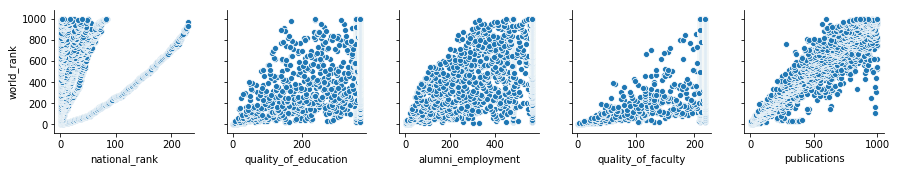

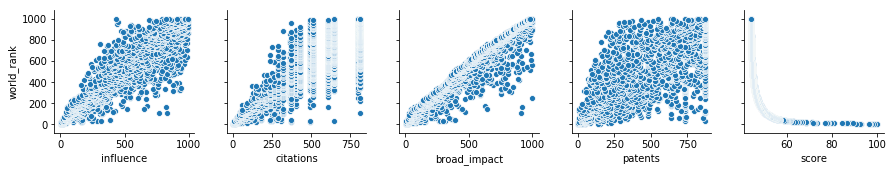

In [10]:
sns.pairplot(world_rank,x_vars = ['national_rank','quality_of_education','alumni_employment',
                       'quality_of_faculty','publications'],y_vars = 'world_rank')
sns.pairplot(world_rank,x_vars = ['influence','citations','broad_impact',
                       'patents','score'],y_vars = 'world_rank')
plt.show()

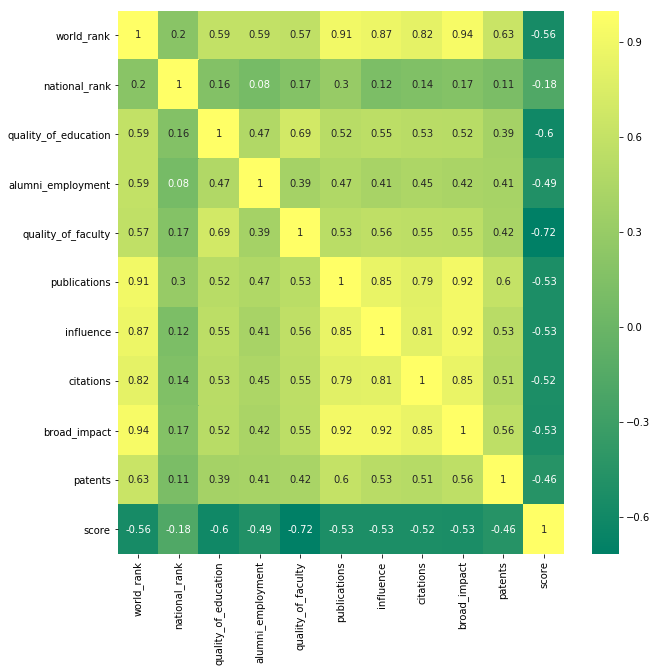

In [11]:
plt.figure(figsize=(10,10))
sns.heatmap(world_rank.corr(),annot = True,cmap='summer')

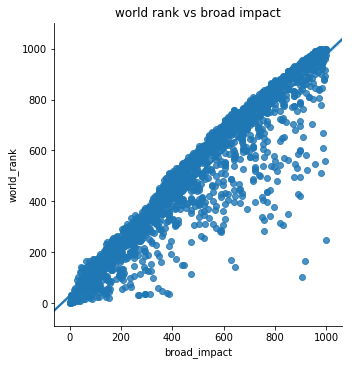

In [12]:
sns.lmplot(x = 'broad_impact',y= 'world_rank',data = world_rank)
plt.title('world rank vs broad impact')
plt.show()

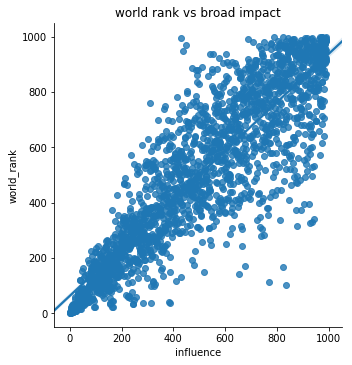

In [13]:
sns.lmplot(x = 'influence',y= 'world_rank',data = world_rank)
plt.title('world rank vs broad impact')
plt.show()

In [14]:
country_frame = pd.get_dummies(world_rank.country,drop_first=True)

In [15]:
df_world_rank = pd.concat([world_rank,country_frame],axis = 'columns')

In [16]:
df_world_rank = df_world_rank.drop(list(df_world_rank.dtypes[df_world_rank.dtypes=='object'].index),axis='columns')

In [17]:
df_train,df_test = train_test_split(df_world_rank,train_size = 0.7,test_size=0.3,random_state=42)

In [18]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [19]:
vars = ['world_rank', 'national_rank', 'quality_of_education',
       'alumni_employment', 'quality_of_faculty', 'publications', 'influence',
       'citations', 'broad_impact', 'patents', 'score']
scaler = MinMaxScaler()
df_train[vars] = scaler.fit_transform(df_train[vars])

/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [20]:
df_train.shape
df_train.head()

,world_rank,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,Australia,Austria,Belgium,Brazil,Bulgaria,Canada,Chile,China,Colombia,Croatia,Cyprus,Czech Republic,Denmark,Egypt,Estonia,Finland,France,Germany,Greece,Hong Kong,Hungary,Iceland,India,Iran,Ireland,Israel,Italy,Japan,Lebanon,Lithuania,Malaysia,Mexico,Netherlands,New Zealand,Norway,Poland,Portugal,Puerto Rico,Romania,Russia,Saudi Arabia,Serbia,Singapore,Slovak Republic,Slovenia,South Africa,South Korea,Spain,Sweden,Switzerland,Taiwan,Thailand,Turkey,USA,Uganda,United Arab Emirates,United Kingdom,Uruguay
1036,0.836837,0.132159,0.967213,0.842756,0.963134,0.918838,0.982828,0.985203,0.969970,0.221839,0.007860,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
775,0.575576,0.030837,0.967213,0.362191,0.963134,0.532064,0.936364,0.499383,0.755756,0.320690,0.015541,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
757,0.557558,0.013216,0.967213,0.842756,0.963134,0.492986,0.416162,0.381011,0.459459,0.845977,0.016434,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1435,0.235235,0.052863,1.000000,1.000000,1.000000,0.157315,0.102020,0.394575,0.187187,0.589655,0.049839,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1560,0.360360,0.559471,0.674863,0.358657,1.000000,0.466934,0.304040,0.324291,0.338338,0.583908,0.024830,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [21]:
y_train = df_train.pop('world_rank')
X_train = df_train

In [22]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calculate_vif(df):
    vif = pd.DataFrame()
    X = df
    vif['features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)    
    vif = vif.sort_values(by = 'VIF',ascending=False)
    return vif

In [23]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

In [24]:
from sklearn.feature_selection import RFE
lm.fit(X_train,y_train)
rfe = RFE(lm,15)
rfe = rfe.fit(X_train,y_train)

In [25]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('national_rank', False, 18),
 ('quality_of_education', True, 1),
 ('alumni_employment', True, 1),
 ('quality_of_faculty', False, 29),
 ('publications', True, 1),
 ('influence', False, 25),
 ('citations', False, 38),
 ('broad_impact', True, 1),
 ('patents', True, 1),
 ('score', True, 1),
 ('Australia', False, 14),
 ('Austria', False, 54),
 ('Belgium', False, 36),
 ('Brazil', False, 20),
 ('Bulgaria', False, 50),
 ('Canada', False, 47),
 ('Chile', False, 3),
 ('China', False, 27),
 ('Colombia', True, 1),
 ('Croatia', False, 2),
 ('Cyprus', False, 5),
 ('Czech Republic', False, 44),
 ('Denmark', False, 13),
 ('Egypt', False, 42),
 ('Estonia', False, 37),
 ('Finland', False, 28),
 ('France', False, 11),
 ('Germany', False, 34),
 ('Greece', False, 40),
 ('Hong Kong', False, 48),
 ('Hungary', False, 43),
 ('Iceland', False, 45),
 ('India', True, 1),
 ('Iran', False, 12),
 ('Ireland', False, 53),
 ('Israel', False, 4),
 ('Italy', False, 22),
 ('Japan', False, 21),
 ('Lebanon', True, 1),
 ('

In [26]:
cols = X_train.columns[rfe.support_]
cols

Index(['quality_of_education', 'alumni_employment', 'publications',
       'broad_impact', 'patents', 'score', 'Colombia', 'India', 'Lebanon',
       'Malaysia', 'Russia', 'Saudi Arabia', 'Singapore', 'South Africa',
       'South Korea'],
      dtype='object')

In [27]:
X_train_rfe = X_train[cols]

In [28]:
X_train_rfe.head()

,quality_of_education,alumni_employment,publications,broad_impact,patents,score,Colombia,India,Lebanon,Malaysia,Russia,Saudi Arabia,Singapore,South Africa,South Korea
1036,0.967213,0.842756,0.918838,0.969970,0.221839,0.007860,0,0,0,0,0,0,0,0,1
775,0.967213,0.362191,0.532064,0.755756,0.320690,0.015541,0,1,0,0,0,0,0,0,0
757,0.967213,0.842756,0.492986,0.459459,0.845977,0.016434,0,0,0,0,0,0,0,0,0
1435,1.000000,1.000000,0.157315,0.187187,0.589655,0.049839,0,0,0,0,0,0,0,0,0
1560,0.674863,0.358657,0.466934,0.338338,0.583908,0.024830,0,0,0,0,0,0,0,0,0


In [29]:
# Model 1
import statsmodels.api as sm
X_train_lm1 = sm.add_constant(X_train_rfe)
lm1 = sm.OLS(y_train,X_train_lm1).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:             world_rank   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     1935.
Date:                Fri, 03 May 2019   Prob (F-statistic):               0.00
Time:                        12:46:56   Log-Likelihood:                 1896.9
No. Observations:                1400   AIC:                            -3762.
Df Residuals:                    1384   BIC:                            -3678.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.1213 

In [30]:
# Model 2
import statsmodels.api as sm
X_train_new2 = X_train_rfe.drop('Singapore',axis='columns')
X_train_lm2 = sm.add_constant(X_train_new2)
lm2 = sm.OLS(y_train,X_train_lm2).fit()
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:             world_rank   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     2071.
Date:                Fri, 03 May 2019   Prob (F-statistic):               0.00
Time:                        12:46:56   Log-Likelihood:                 1895.7
No. Observations:                1400   AIC:                            -3761.
Df Residuals:                    1385   BIC:                            -3683.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.1212 

In [31]:
# Model 3
X_train_new3 = X_train_new2.drop('Colombia',axis='columns')
X_train_lm3 = sm.add_constant(X_train_new3)
lm3 = sm.OLS(y_train,X_train_lm3).fit()
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:             world_rank   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     2226.
Date:                Fri, 03 May 2019   Prob (F-statistic):               0.00
Time:                        12:46:56   Log-Likelihood:                 1894.0
No. Observations:                1400   AIC:                            -3760.
Df Residuals:                    1386   BIC:                            -3687.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.1212 

In [32]:
vif1 = X_train_lm3.drop('const',axis='columns')
calculate_vif(vif1)

,features,VIF
2,publications,28.57
3,broad_impact,27.49
0,quality_of_education,10.01
1,alumni_employment,7.94
4,patents,7.83
12,South Korea,1.19
5,score,1.08
9,Russia,1.06
6,India,1.04
10,Saudi Arabia,1.04


In [33]:
# Model 4
import statsmodels.api as sm
X_train_new4 = X_train_new3.drop('publications',axis='columns')
X_train_lm4 = sm.add_constant(X_train_new4)
lm4 = sm.OLS(y_train,X_train_lm4).fit()
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:             world_rank   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.953
Method:                 Least Squares   F-statistic:                     2349.
Date:                Fri, 03 May 2019   Prob (F-statistic):               0.00
Time:                        12:46:56   Log-Likelihood:                 1876.0
No. Observations:                1400   AIC:                            -3726.
Df Residuals:                    1387   BIC:                            -3658.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.1237 

In [34]:
vif2 = X_train_lm4.drop('const',axis=1)
calculate_vif(vif2)

,features,VIF
0,quality_of_education,10.01
1,alumni_employment,7.80
2,broad_impact,7.65
3,patents,7.57
11,South Korea,1.19
4,score,1.07
8,Russia,1.06
5,India,1.04
9,Saudi Arabia,1.03
6,Lebanon,1.02


In [35]:
# Model 5
import statsmodels.api as sm
X_train_new5 = X_train_new4.drop('quality_of_education',axis='columns')
X_train_lm5 = sm.add_constant(X_train_new5)
lm5 = sm.OLS(y_train,X_train_lm5).fit()
print(lm5.summary())

                            OLS Regression Results                            
Dep. Variable:             world_rank   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     2459.
Date:                Fri, 03 May 2019   Prob (F-statistic):               0.00
Time:                        12:46:57   Log-Likelihood:                 1848.0
No. Observations:                1400   AIC:                            -3672.
Df Residuals:                    1388   BIC:                            -3609.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.0879      0.00

In [36]:
vif3 = X_train_lm5.drop('const',axis=1)
calculate_vif(vif3)

,features,VIF
2,patents,7.05
1,broad_impact,6.82
0,alumni_employment,5.74
10,South Korea,1.16
3,score,1.06
4,India,1.04
8,Saudi Arabia,1.03
7,Russia,1.02
5,Lebanon,1.01
6,Malaysia,1.01


In [37]:
# Model 6
import statsmodels.api as sm
X_train_new6 = X_train_new5.drop('patents',axis='columns')
X_train_lm6 = sm.add_constant(X_train_new6)
lm6 = sm.OLS(y_train,X_train_lm6).fit()
print(lm6.summary())

                            OLS Regression Results                            
Dep. Variable:             world_rank   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.947
Method:                 Least Squares   F-statistic:                     2503.
Date:                Fri, 03 May 2019   Prob (F-statistic):               0.00
Time:                        12:46:57   Log-Likelihood:                 1796.0
No. Observations:                1400   AIC:                            -3570.
Df Residuals:                    1389   BIC:                            -3512.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.0685      0.00

In [38]:
# Model 7
import statsmodels.api as sm
X_train_new7 = X_train_new6.drop('score',axis='columns')
X_train_lm7 = sm.add_constant(X_train_new7)
lm7 = sm.OLS(y_train,X_train_lm7).fit()
print(lm7.summary())

                            OLS Regression Results                            
Dep. Variable:             world_rank   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.947
Method:                 Least Squares   F-statistic:                     2780.
Date:                Fri, 03 May 2019   Prob (F-statistic):               0.00
Time:                        12:46:57   Log-Likelihood:                 1795.2
No. Observations:                1400   AIC:                            -3570.
Df Residuals:                    1390   BIC:                            -3518.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.0632      0.00

In [39]:
vif4 = X_train_lm7.drop('const',axis=1)
calculate_vif(vif4)

,features,VIF
1,broad_impact,4.60
0,alumni_employment,4.34
8,South Korea,1.05
2,India,1.04
6,Saudi Arabia,1.02
3,Lebanon,1.01
5,Russia,1.01
7,South Africa,1.01
4,Malaysia,1.00


In [40]:
y_train_rank = lm7.predict(X_train_lm7)

In [41]:
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

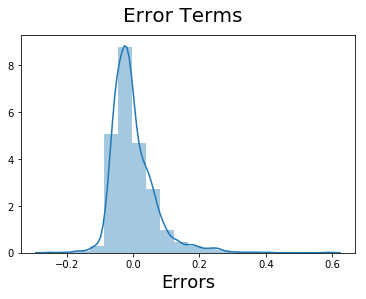

In [42]:
fig = plt.figure()
sns.distplot(y_train_rank-y_train,bins=20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)  
fig.show()

In [43]:
vars1 = ['world_rank', 'national_rank', 'quality_of_education',
       'alumni_employment', 'quality_of_faculty', 'publications', 'influence',
       'citations', 'broad_impact', 'patents', 'score']
df_test[vars1] = scaler.transform(df_test[vars1])

In [44]:
y_test = df_test.pop('world_rank')
X_test = df_test

In [45]:
X_test_new = X_test[X_train_new7.columns]

In [46]:
X_test_new = sm.add_constant(X_test_new)

In [47]:
y_pred = lm7.predict(X_test_new)

Text(0, 0.5, 'y_pred')

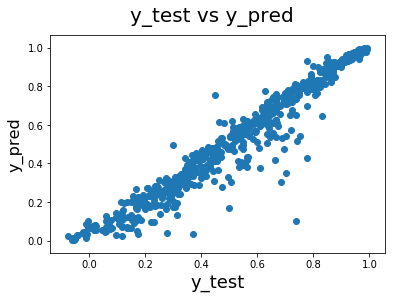

In [48]:
fig = plt.figure()
plt.scatter(y_pred,y_test)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)    

In [49]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_test,y_pred))

0.07347800990107385

In [50]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.9310823180071887